In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from dateutil.relativedelta import relativedelta

plt.rcParams.update({'figure.max_open_warning': 0})
pd.options.mode.chained_assignment = None

In [2]:
input_file = 'D://Repositories/covid-19-data/public/data/owid-covid-data.csv'

n = 21
group_one = ['USA', 'IND']
fig_size = (15, 3)
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'North America', 'Oceania', 'South America']

today = datetime.today().strftime('%Y-%m-%d')
two_days = (datetime.today()-relativedelta(days=2)).strftime('%Y-%m-%d')
one_day = (datetime.today()-relativedelta(days=1)).strftime('%Y-%m-%d')
last_day = two_days

In [3]:
inp = pd.read_csv(input_file)
inp['daily_tests'] = inp['new_tests'].rolling(7).mean()
inp['daily_cases'] = inp['new_cases'].rolling(7).mean()
inp['daily_deaths'] = inp['new_deaths'].rolling(7).mean()
inp['daily_hosp'] = inp['hosp_patients'].rolling(7).mean()
inp['daily_vacc'] = inp['new_vaccinations'].rolling(7).mean()
inp['daily_deaths_change_1w'] = inp['daily_deaths'].pct_change(periods=6)*100
inp['daily_cases_change_1w'] = inp['daily_cases'].pct_change(periods=6)*100
inp['daily_hosp_change_1w'] = inp['daily_hosp'].pct_change(periods=6)*100
inp['daily_vacc_change_1w'] = inp['daily_vacc'].rolling(7).mean()

inp['cfr'] = (100*inp['total_deaths'].rolling(7).sum()/inp['total_cases'].rolling(7).sum()).round(2)
inp['cfr_current'] = (100*inp['daily_deaths'].rolling(7).sum()/inp['daily_cases'].rolling(7).sum()).round(2)
inp['ptr'] = (100*inp['total_cases'].rolling(7).sum()/inp['total_tests'].rolling(7).sum()).round(2)
inp['ptr_current'] = (100*inp['daily_cases'].rolling(7).sum()/inp['daily_tests'].rolling(7).sum()).round(2)
inp['date'] = pd.to_datetime(inp['date'])

# print(inp.columns)
# inp[inp['iso_code'].isin(['OWID_WRL']+group_one)].groupby('iso_code').tail(3)[[
#     'iso_code', 'date', 'total_cases', 'total_deaths', 'total_vaccinations', 'total_vaccinations_per_hundred',
#     'daily_cases', 'daily_deaths', 'daily_hosp', 'daily_vacc',
#     'daily_deaths_change_1w', 'daily_cases_change_1w', 'daily_hosp_change_1w', 'daily_vacc_change_1w',
#     'cfr', 'cfr_current', 'ptr', 'ptr_current']]

In [4]:
top_n = inp[(inp['date'] == last_day) & ~inp['location'].isin(continents) & (inp['total_cases'] >= 1000000)].sort_values(
    'total_cases', ascending=False)['iso_code'].tolist()

In [5]:
df = inp[(inp['iso_code'].isin(top_n)) & (inp['date'] == last_day)][[
    'date', 'iso_code', 'population', 'total_cases', 'total_deaths', 'total_vaccinations', 'total_vaccinations_per_hundred',
    'cfr', 'daily_cases_change_1w', 'daily_deaths_change_1w']]

df['cases_%_world'] = (df['total_cases']*100)/int(df[df['iso_code'] == 'OWID_WRL']['total_cases'])
df['deaths_%_world'] = (df['total_deaths']*100)/int(df[df['iso_code'] == 'OWID_WRL']['total_deaths'])
df['cases_1M_pop'] = ((df['total_cases']*1000000)/(df['population'])).astype(int)
df['deaths_1M_pop'] = ((df['total_deaths']*1000000)/(df['population'])).astype(int)

df.sort_values('cases_%_world', ascending=False).set_index('iso_code')

,date,population,total_cases,total_deaths,total_vaccinations,total_vaccinations_per_hundred,cfr,daily_cases_change_1w,daily_deaths_change_1w,cases_%_world,deaths_%_world,cases_1M_pop,deaths_1M_pop
iso_code,,,,,,,,,,,,,
OWID_WRL,2021-02-09,7.794799e+09,106905601.0,2341104.0,148080629.0,1.90,2.18,-13.895601,-7.999873,100.000000,100.000000,13714,300
USA,2021-02-09,3.310026e+08,27192455.0,468203.0,43206190.0,12.92,1.71,-21.071363,-7.518380,25.435950,19.999240,82151,1414
IND,2021-02-09,1.380004e+09,10858371.0,155252.0,6611561.0,0.48,1.43,-8.880773,-23.364486,10.156971,6.631572,7868,112
BRA,2021-02-09,2.125594e+08,9599565.0,233520.0,3820207.0,1.80,2.43,-7.706163,-2.580384,8.979478,9.974781,45161,1098
GBR,2021-02-09,6.788600e+07,3983756.0,114066.0,13577851.0,20.00,2.84,-23.730257,-21.723399,3.726424,4.872317,58683,1680
RUS,2021-02-09,1.459345e+08,3953970.0,76347.0,NaN,NaN,1.92,-10.306798,-4.566081,3.698562,3.261154,27094,523
FRA,2021-02-09,6.527351e+07,3419210.0,80295.0,2356862.0,3.47,2.34,-6.249568,-7.290672,3.198345,3.429792,52382,1230
ESP,2021-02-09,4.675478e+07,3005487.0,63061.0,2233249.0,4.78,2.09,-28.001575,5.748620,2.811347,2.693644,64281,1348
ITA,2021-02-09,6.046183e+07,2655319.0,92002.0,2707392.0,4.48,3.47,2.502329,-9.314227,2.483798,3.929855,43917,1521


<AxesSubplot:title={'center':'Vaccinations'}, xlabel='iso_code'>

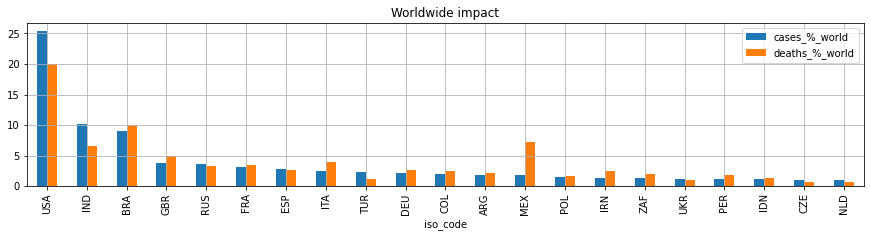

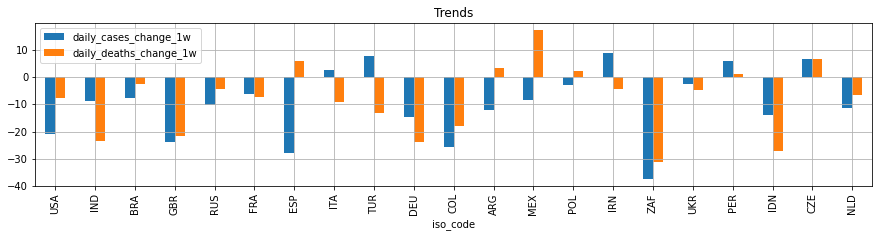

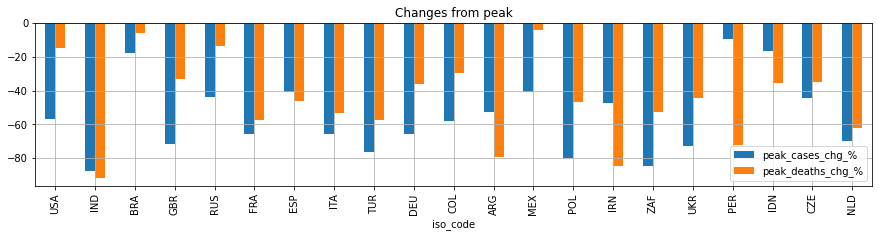

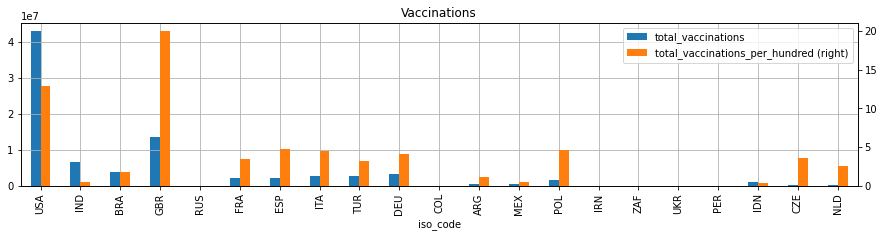

In [6]:
df[df['iso_code'] != 'OWID_WRL'].sort_values('cases_%_world', ascending=False).plot(
    x='iso_code', y=['cases_%_world', 'deaths_%_world'],
    kind='bar', figsize=fig_size, grid=True, title='Worldwide impact')

df[df['iso_code'] != 'OWID_WRL'].sort_values('cases_%_world', ascending=False).plot(
    x='iso_code', y=['daily_cases_change_1w', 'daily_deaths_change_1w'],
    kind='bar', figsize=fig_size, grid=True, title='Trends')

df_max = inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] <= last_day)].groupby('iso_code')[['daily_cases', 'daily_deaths']].max()
df_last = inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)][['iso_code', 'daily_cases', 'daily_deaths']].set_index('iso_code')
df_pct_chg_max = ((df_last-df_max)*100/df_max)
df_pct_chg_max['total_cases'] = inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].set_index('iso_code')['total_cases']
df_pct_chg_max = df_pct_chg_max.rename(columns={'daily_cases': 'peak_cases_chg_%','daily_deaths': 'peak_deaths_chg_%'})

df_pct_chg_max.sort_values(by='total_cases', ascending=False).plot(
    y=['peak_cases_chg_%', 'peak_deaths_chg_%'],
    kind='bar', figsize=fig_size, grid=True, title='Changes from peak')

df[df['iso_code'] != 'OWID_WRL'].sort_values('cases_%_world', ascending=False).plot(
    x='iso_code', y=['total_vaccinations', 'total_vaccinations_per_hundred'], secondary_y=['total_vaccinations_per_hundred'],
    kind='bar', figsize=fig_size, grid=True, title='Vaccinations')

In [7]:
df_pct_chg_max

,peak_cases_chg_%,peak_deaths_chg_%,total_cases
iso_code,,,
ARG,-52.782893,-79.355306,1993295.0
BRA,-17.934414,-6.070079,9599565.0
COL,-58.154065,-29.602625,2166904.0
CZE,-44.181995,-35.149864,1045132.0
DEU,-65.593819,-35.888836,2302051.0
ESP,-40.705201,-46.270627,3005487.0
FRA,-65.555660,-57.345833,3419210.0
GBR,-71.346944,-33.405541,3983756.0
IDN,-16.612624,-35.506241,1174779.0


<AxesSubplot:title={'center':'Top total vaccs'}, xlabel='iso_code'>

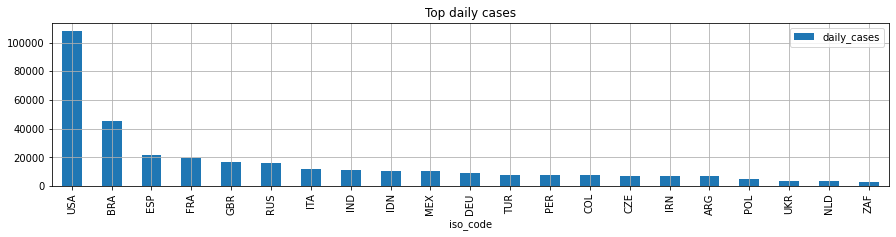

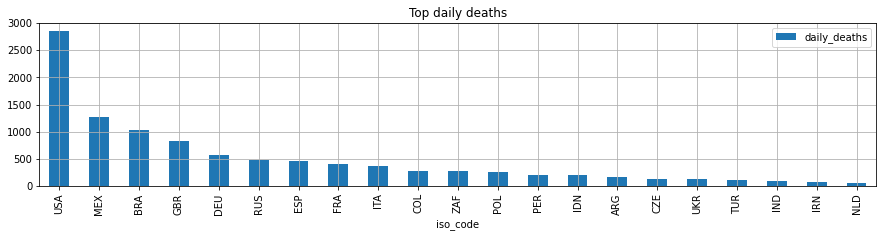

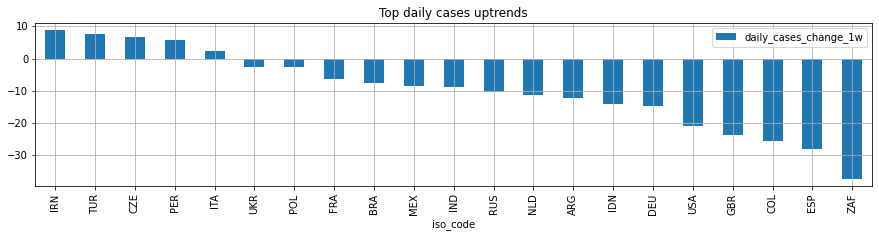

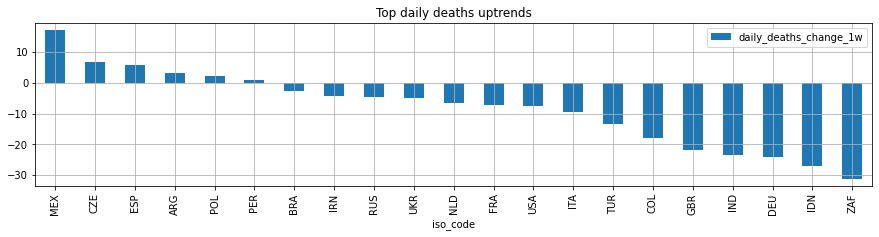

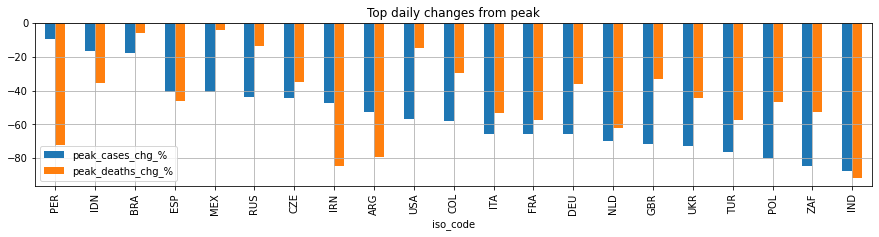

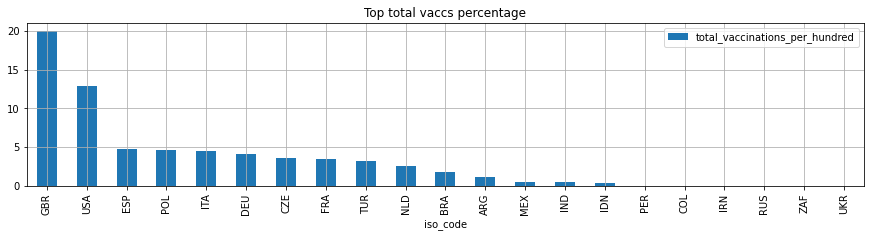

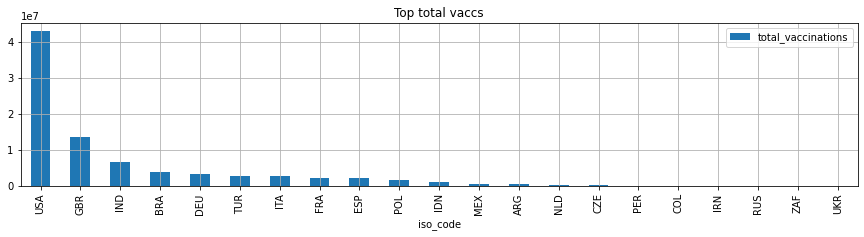

In [8]:
inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='daily_cases', ascending=False).head(n).plot(
    x='iso_code', y=['daily_cases'], kind='bar',
    figsize=fig_size, grid=True, title='Top daily cases')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='daily_deaths', ascending=False).head(n).plot(
    x='iso_code', y=['daily_deaths'], kind='bar',
    figsize=fig_size, grid=True, title='Top daily deaths')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='daily_cases_change_1w', ascending=False).head(n).plot(
    x='iso_code', y=['daily_cases_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='Top daily cases uptrends')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='daily_deaths_change_1w', ascending=False).head(n).plot(
    x='iso_code', y=['daily_deaths_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='Top daily deaths uptrends')

df_pct_chg_max.sort_values(by=['peak_cases_chg_%', 'peak_deaths_chg_%', 'total_cases'], ascending=[False, False, False]).plot(
    y=['peak_cases_chg_%', 'peak_deaths_chg_%'],
    kind='bar', figsize=fig_size, grid=True, title='Top daily changes from peak')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='total_vaccinations_per_hundred', ascending=False).head(n).plot(
    x='iso_code', y=['total_vaccinations_per_hundred'], kind='bar',
    figsize=fig_size, grid=True, title='Top total vaccs percentage')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='total_vaccinations', ascending=False).head(n).plot(
    x='iso_code', y=['total_vaccinations'], kind='bar',
    figsize=fig_size, grid=True, title='Top total vaccs')

In [9]:
def plot_weekly_avg(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')][[
        'date', 'daily_cases', 'daily_deaths', 'daily_hosp', 'daily_vacc']].plot(
        x='date', y=['daily_cases', 'daily_deaths', 'daily_hosp'],
        secondary_y=['daily_deaths'],
        style = ['-', '-', '--', '--'], figsize=fig_size, grid=True, title=country)
    
def plot_cfr(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')].plot(
        x='date', y='cfr', style = ['--'], figsize=fig_size, grid=True, title=country)
    
def plot_ptr(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')].plot(
        x='date', y='ptr',
        style = ['--'], figsize=fig_size, grid=True, title=country)
    
def plot_totals(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')][[
        'date', 'total_cases', 'total_deaths', 'total_vaccinations']].plot(
        x='date', y=['total_cases', 'total_deaths', 'total_vaccinations'], secondary_y=['total_deaths'],
        style = ['-', '-', '--'], figsize=fig_size, grid=True, title=country)

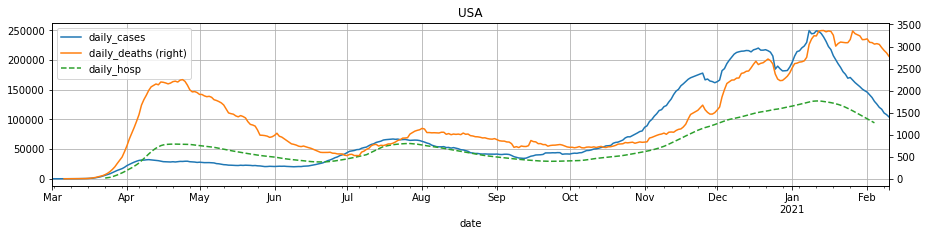

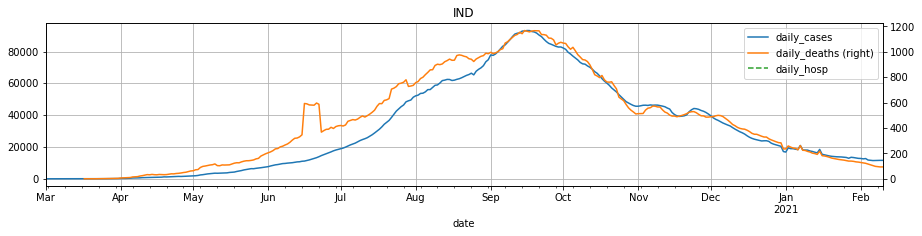

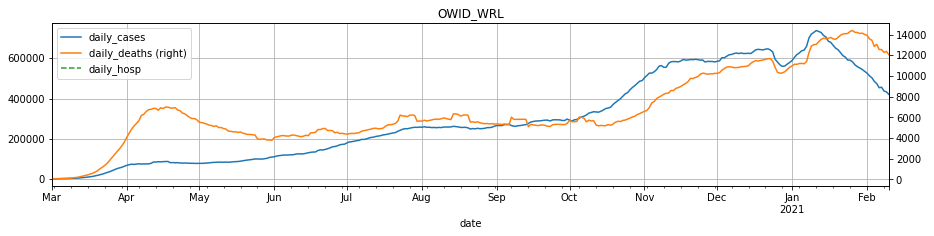

In [10]:
for country in group_one+['OWID_WRL']:
    plot_weekly_avg(inp, iso_code=country)

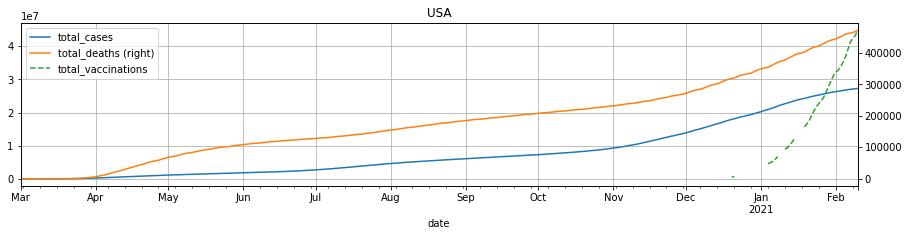

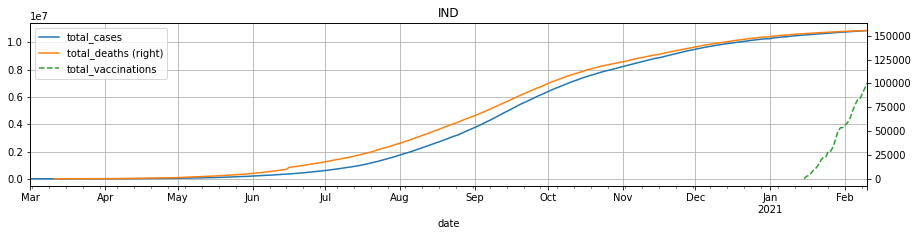

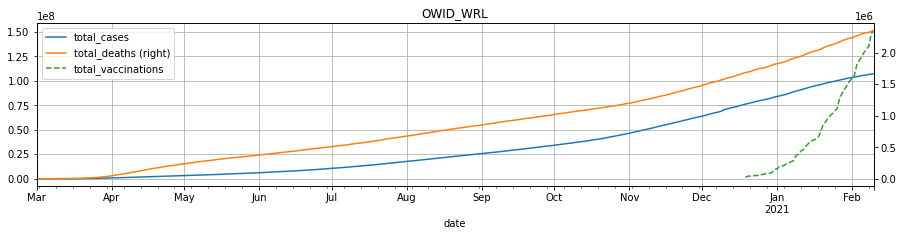

In [11]:
for country in group_one+['OWID_WRL']:
    plot_totals(inp, iso_code=country)

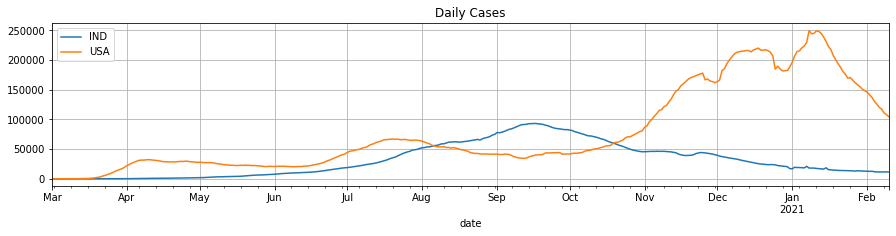

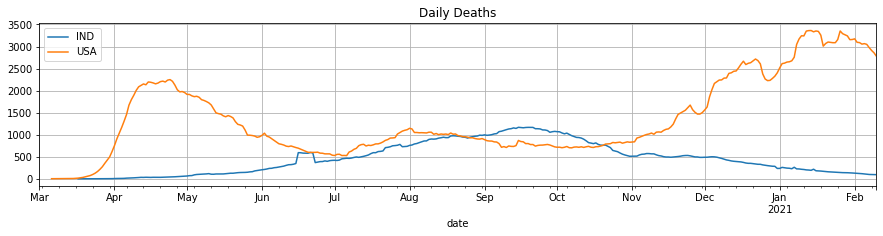

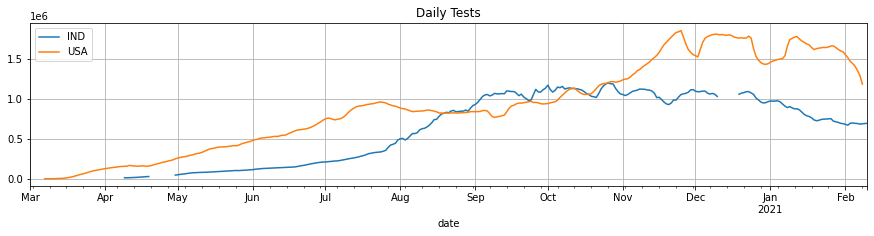

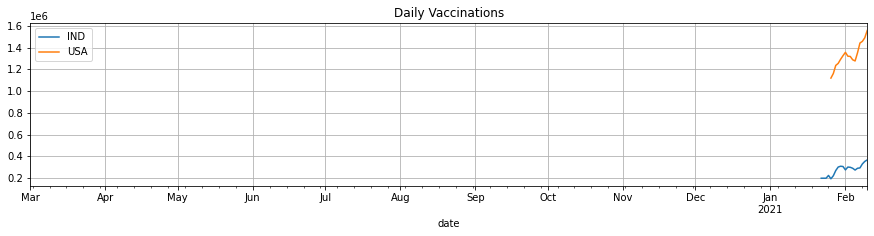

In [12]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_cases'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Cases')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_deaths'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Deaths')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_tests'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Tests')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_vacc'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Vaccinations')
axes.legend(list(sorted(group_one)))

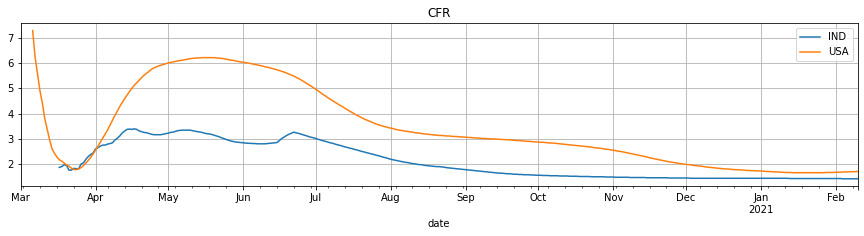

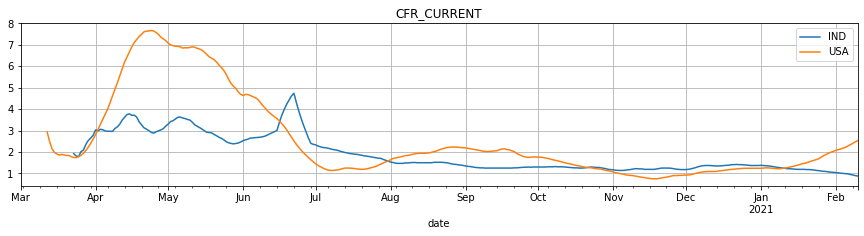

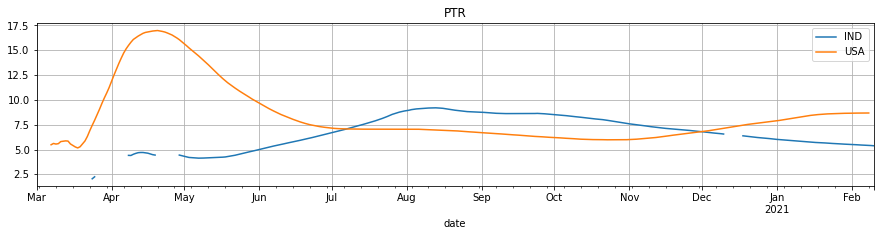

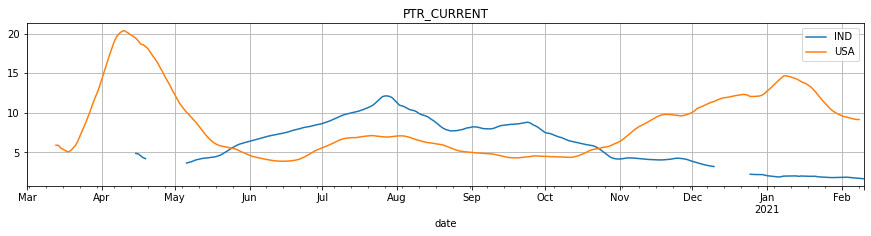

In [13]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['cfr'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='CFR')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['cfr_current'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='CFR_CURRENT')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['ptr'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='PTR')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['ptr_current'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='PTR_CURRENT')
axes.legend(list(sorted(group_one)))

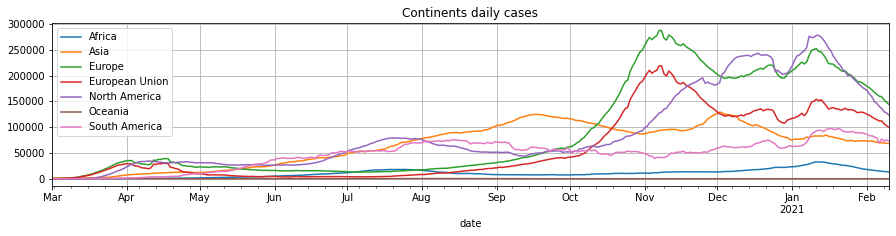

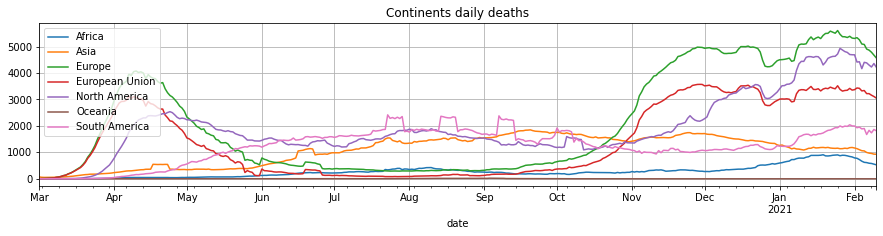

In [14]:
inp_continents = inp[inp['location'].isin(continents) & (inp['date'] >= '2020-03-01')]
fig, axes = plt.subplots(sharex=True)

for c in continents:
    inp_continents[inp_continents['location'] == c].plot(
        x='date', y='daily_cases',
        figsize=fig_size, grid=True, ax=axes, title='Continents daily cases')
    
axes.legend(list(sorted(continents)))

inp_continents = inp[inp['location'].isin(continents) & (inp['date'] >= '2020-03-01')]

fig, axes = plt.subplots(sharex=True)

for c in continents:
    inp_continents[inp_continents['location'] == c].plot(
        x='date', y='daily_deaths',
        figsize=fig_size, grid=True, ax=axes, title='Continents daily deaths')
    
axes.legend(list(sorted(continents)))

<AxesSubplot:title={'center':'Continents totals'}, xlabel='location'>

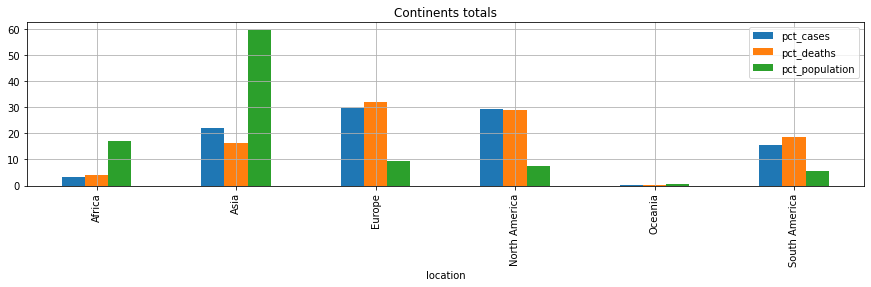

In [15]:
inp_continents_current = inp_continents[(inp_continents['location'] != 'European Union') &
                                        (inp_continents['date'] == last_day)]

inp_continents_current['pct_cases'] = inp_continents_current['total_cases']*100/inp_continents_current['total_cases'].sum()
inp_continents_current['pct_deaths'] = inp_continents_current['total_deaths']*100/inp_continents_current['total_deaths'].sum()
inp_continents_current['pct_population'] = [17.2, 59.54, 9.59, 7.6, 0.55, 5.53]

inp_continents_current.plot(
    x='location', y=['pct_cases', 'pct_deaths', 'pct_population'],
    kind='bar', figsize=fig_size, grid=True, title='Continents totals')